In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [ ]:
#Load the training and testing dataset(MNIST)
#This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


cifar10=tf.keras.datasets.cifar10      #importing dataset
(x_train,y_train), (x_test, y_test)=cifar10.load_data()  #splitting it into training and testing

x_train=x_train/255         #converted grey scale value from 0 to 1
x_test=x_test/255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# define the network architecture using keras

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")

])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train model using SGD

model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",      #measures dissimilarity
             metrics=['accuracy'])

history=model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size=30,epochs=10)

Epoch 1/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5106 - loss: 1.3883 - val_accuracy: 0.4914 - val_loss: 1.4501
Epoch 2/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5185 - loss: 1.3665 - val_accuracy: 0.4926 - val_loss: 1.4235
Epoch 3/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5199 - loss: 1.3589 - val_accuracy: 0.4937 - val_loss: 1.4308
Epoch 4/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5316 - loss: 1.3379 - val_accuracy: 0.4695 - val_loss: 1.4767
Epoch 5/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5345 - loss: 1.3280 - val_accuracy: 0.4769 - val_loss: 1.4754
Epoch 6/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5329 - loss: 1.3275 - val_accuracy: 0.4965 - val_loss: 1.4282
Epoch 7/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5388 - loss: 1.3082 - val_accuracy: 0.4897 - val_loss: 1.4513
Epoch 8/10
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5413 - loss: 1.2998 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5033 - loss: 1.4371
Loss=1.446
Accuracy=0.496
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Value:  [7.18404591e-01 1.03545645e-02 2.13800278e-02 3.17409780e-04
 2.67590806e-02 3.08683462e-04 1.08287049e-05 3.27802002e-02
 1.36666551e-01 5.30181378e-02]


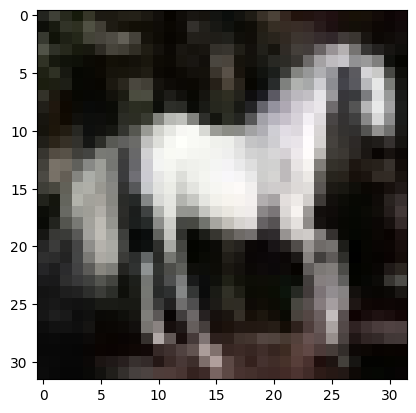

In [ ]:
# Evaluate the network


test_loss, test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


n=random.randint(0,9999)
predicted_value=model.predict(x_test)
plt.imshow(x_test[13])
plt.show

print('Predicted Value: ', predicted_value[n])

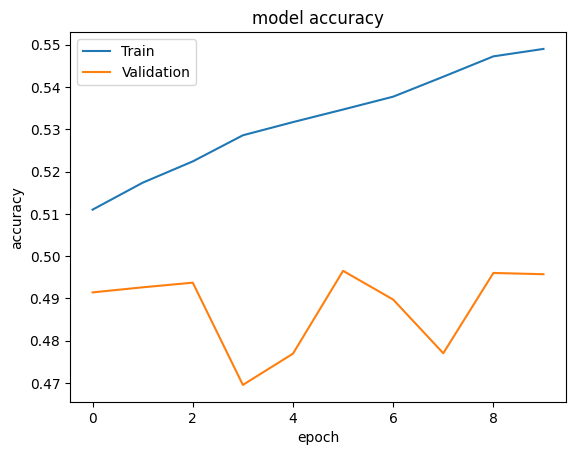

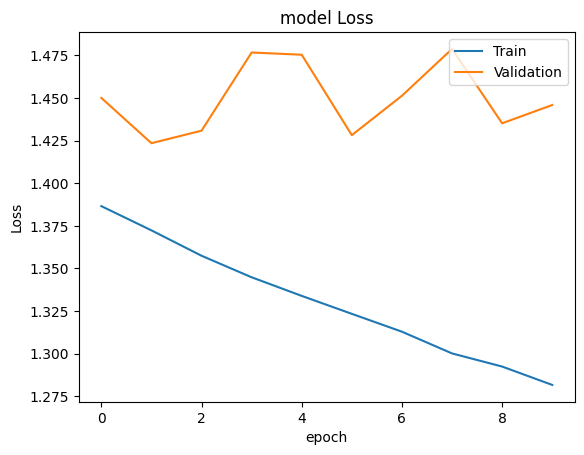

In [ ]:
#f. PLOT THE TRAINING LOSS AND ACCURACY ->

 # Plotting The Training Accuracy:-

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# Plotting The Training Loss :-
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()